## P1 OpenCV简介

[OpenCV-Python Tutorials](https://docs.opencv.org/master/d6/d00/tutorial_py_root.html)

## P2 课程框架

- Introduction to OpenCV 介绍
- Gui Features in OpenCV GUI特性
- Core Operations 核心处理
- Image Processing in OpenCV 图像处理
- Feature Detection and Description 特征检测 识别
- Video analysis (video module) 视频分析
- Camera Calibration and 3D Reconstruction 相机校正 3D还原
- Machine Learning 机器学习
- Computational Photography 计算机图像处理
- Object Detection (objdetect module) 目标检测
- OpenCV-Python Bindings 绑定

## P3 图像读取显示和存储


4.0.1
<class 'numpy.ndarray'> (512, 512)
<class 'numpy.ndarray'> (512, 512, 3)
<class 'numpy.ndarray'> (512, 512, 4)
<class 'NoneType'> None


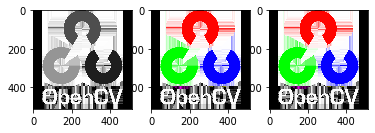

True


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
# 行内显示
%matplotlib inline

print(cv.__version__)
img1 = cv.imread('./img/opencv-logo.png',0)# 灰色
img2 = cv.imread('./img/opencv-logo.png',1)# 彩色
img3 = cv.imread('./img/opencv-logo.png',-1)#含透明通道
imgerr = cv.imread('./img/err',-1)#含透明通道

print(type(img1),img1.shape)
print(type(img2),img2.shape)
print(type(img3),img3.shape)
print(type(imgerr),imgerr)

# cv.imshow('image1',img1)# 
# cv.waitKey(0)# 迭代按键 永久
# cv.destroyAllWindows()# 关闭窗口

# # cv.WINDOW_AUTOSIZE 自动大小
# # cv.WINDOW_NORMAL 可调整窗口大小
# cv.namedWindow('opencv-logo',cv.WINDOW_NORMAL)
# cv.imshow('opencv-logo',img2) # 名字要一样
# k = cv.waitKey(3000)# 这里是毫秒 超时返回-1
# print(k)
# cv.destroyAllWindows()

# vc.imread颜色顺序是GBR plt里是颜色顺序是RGB
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(img3)
plt.show()

print(cv.imwrite("./img/cv_img3.png",img3))


## P4 补充说明waitKey与ord


In [2]:
import cv2 as cv

img1 = cv.imread('./img/opencv-logo.png',0)
cv.imshow('img1',img1)
while True:
    k = cv.waitKey(0) & 0xff
    print(k)
    if k == 27: # esc 退出
        break
    elif k == ord('s'): # 's'保存
        cv.imwrite("./img/cv_img1.png",img1)
        break
    
cv.destroyAllWindows()

#显示使用信息
ord?

115
